# Create csv display for Data web page

In [9]:
# Import Dependencies 
import pandas as pd
from tabula import read_pdf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pyqtgraph as pg
import six

In [3]:
# Read In CSV
df = pd.read_csv('cities.csv')

In [4]:
# Display the data frame
df.head()

City_ID          City  Cloudiness Country        Date  Humidity    Lat  \
0        0  jacareacanga           0      BR  1528902000        62  -6.22   
1        1    kaitangata         100      NZ  1528905304        94 -46.28   
2        2      goulburn          20      AU  1528905078        91 -34.75   
3        3          lata          76      IN  1528905305        89  30.78   
4        4    chokurdakh           0      RU  1528905306        88  70.62   

      Lng  Max Temp  Wind Speed  
0  -57.76     89.60        6.93  
1  169.85     42.61        5.64  
2  149.72     44.32       10.11  
3   78.62     59.89        0.94  
4  147.90     32.17        2.95

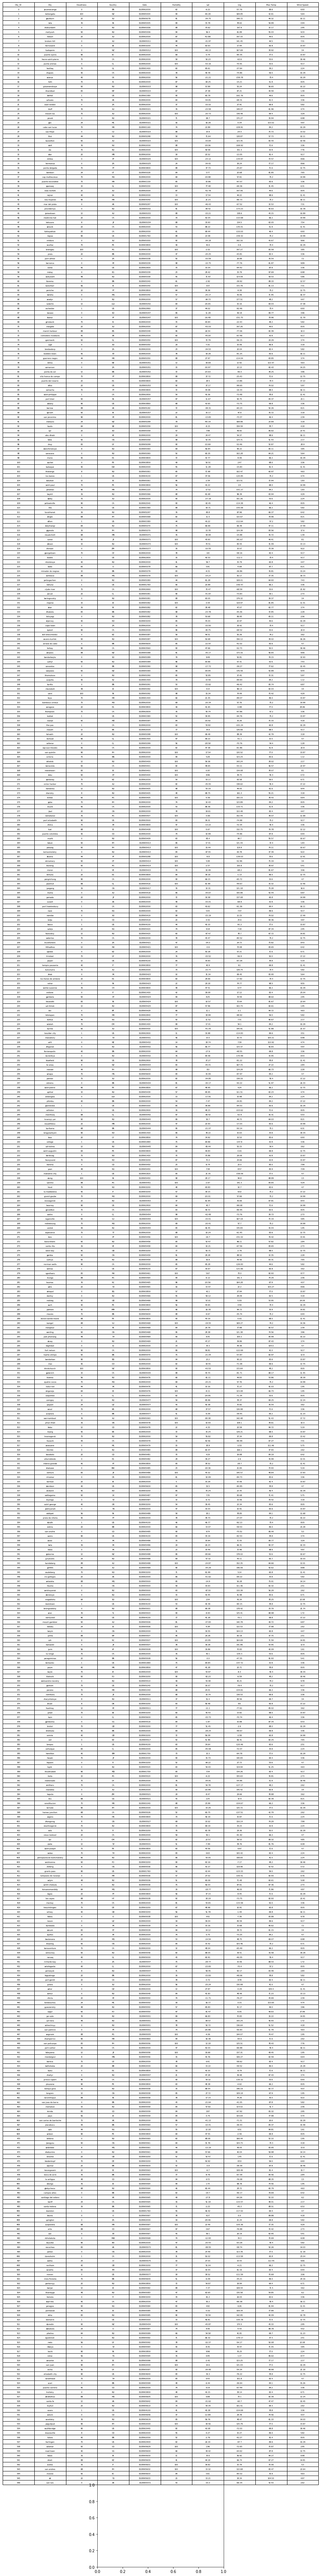

In [5]:
# Create table Fig for Data HTML page
plt.table(cellText=df.values,colWidths = [0.25]*len(df.columns),
          colLabels=df.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='top')
fig = plt.gcf()

# Save the Figure
plt.savefig('Cities.png')

# Display Figure
plt.show(30)

In [6]:
from IPython.display import display, HTML
display( HTML( df.style.render() ) )

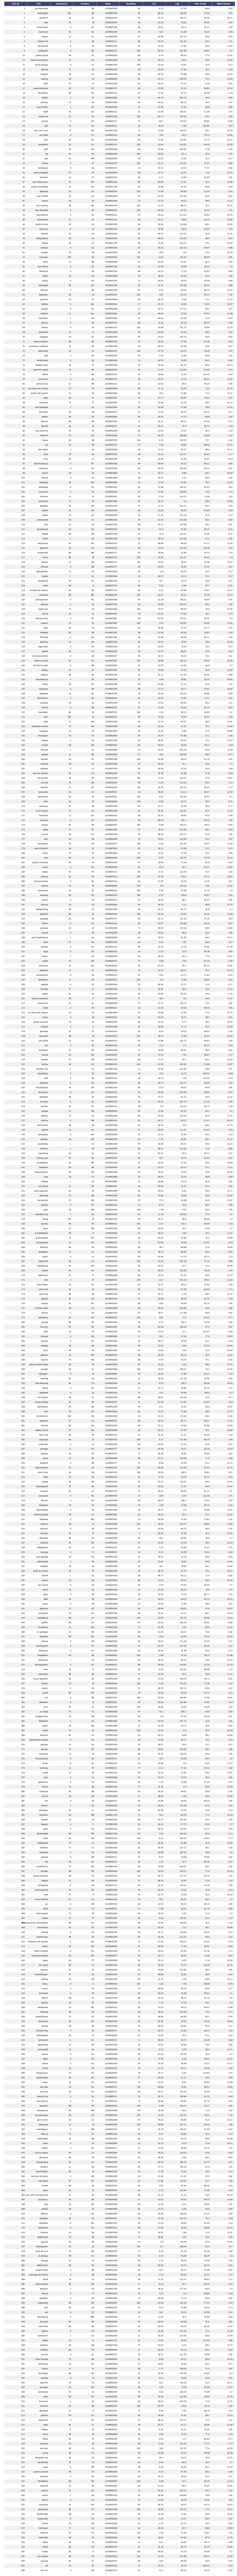

In [12]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#79d4d5', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=3.0)

# Save the Figure
plt.savefig('Cities.png')